In [1]:
# import
import numpy as np
import matplotlib.pyplot as pp

In [49]:
# Générer des nombres aléatoires uniformes [0,1]
va = np.random.random((10000))
print(va)

[0.20495204 0.79728859 0.00973032 ... 0.43793387 0.32572628 0.99315063]


In [50]:
# faire un histogramme
def count_elements(seq, BInf,BSup, NBins):
    δ = (BSup-BInf)/NBins
    hist = np.zeros((NBins))
    for i in seq:
        idx = int(np.floor((i-BInf)/δ))
        hist[idx] += 1
    norm = 0
    for i in hist:
        norm += i*δ
    return hist,norm

h1,norm = count_elements(va,0,1,10)
print(h1)
print(h1/norm)

[ 971. 1002. 1022.  987.  989.  995. 1013.  981. 1038. 1002.]
[0.971 1.002 1.022 0.987 0.989 0.995 1.013 0.981 1.038 1.002]


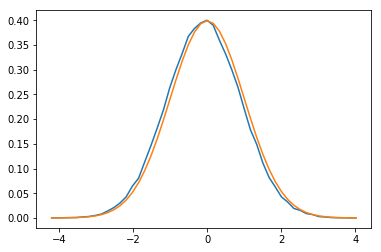

In [51]:
# variables gaussiennes
va_normal = np.random.normal(size=(100000))
δ = (max(va_normal)+0.01-(min(va_normal)-0.01))/50
xr = np.arange(min(va_normal)-0.01,max(va_normal)+0.01,δ)
h2,norm=count_elements(va_normal,min(va_normal)-0.01,max(va_normal)+0.01,50)
# pp.plot(h2)
#normalisation
def gauss(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-x**2 / 2.0)

pp.plot(xr,h2/norm)
pp.plot(xr,gauss(xr))

/home/aurele/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


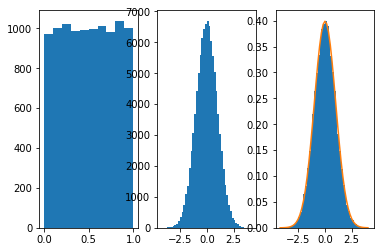

In [57]:
# numpy sait le faire
# vérifier la fonction de répartition : faire un histogramme
f,ax = pp.subplots(1,3)
ax[0].hist(va, range=(0,1), bins=10)
ax[1].hist(va_normal,bins=50)
ax[2].hist(va_normal,bins=50,normed=True)
ax[2].plot(xr,gauss(xr))

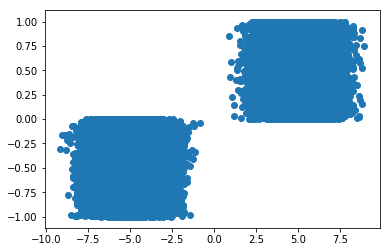

In [88]:
# p(x,y) = p(x|y)p(y)
# p(y) ~ unif(-1,1)
# p(x|y) = Normal(-5,1)\theta(y) + Normal(5,1)\theta(-y)

va_y = np.random.random(size=(100000))*2-1
va_x = np.zeros(va_y.shape[0])
yneg = np.where(va_y < 0)
ypos = np.where(va_y >= 0)
va_x[yneg[0]] = np.random.normal(-5,size=(len(yneg[0])))
va_x[ypos[0]] = np.random.normal(5,size=(len(ypos[0])))

pp.scatter(va_x,va_y)

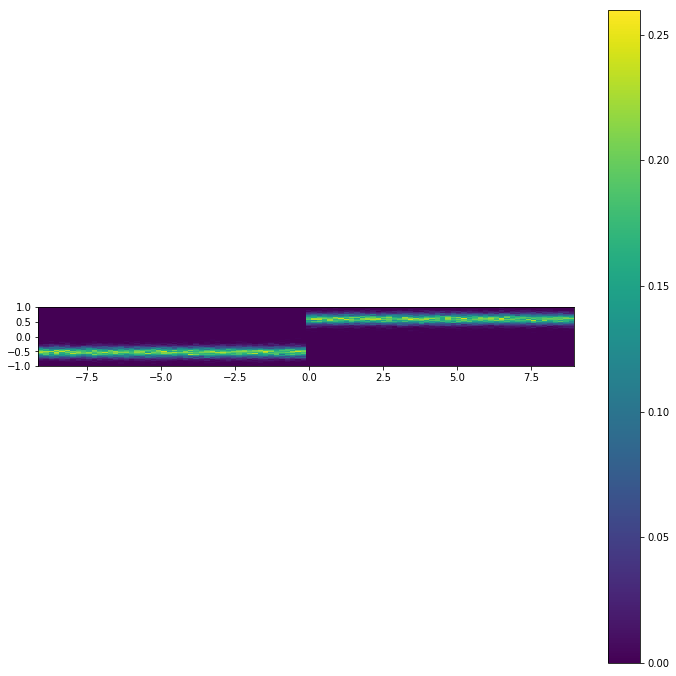

In [93]:
h2D, xedges, yedges = np.histogram2d(va_x,va_y,bins=100,normed=True)
fig = pp.figure(figsize=(12, 12))
pp.imshow(h2D, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
pp.colorbar()

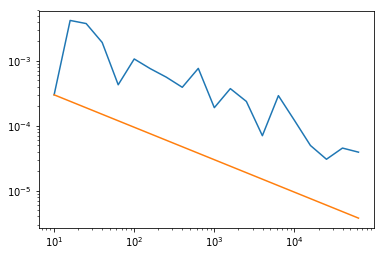

In [128]:
# Loi des gds nombres et convergence
# commençons par des variables de bernoulli
Nva = 10**np.arange(1,5,0.2)
arr_mean = []
for i in Nva: 
    m=0
    for j in range(1000):
        v_b = np.random.randint(2,size=(int(i)))
        m += np.mean(v_b)
    # arr_mean = np.append(arr_mean,np.mean(v_b))
    arr_mean = np.append(arr_mean,m/1000)

# pp.plot(np.log10(Nva),np.abs(arr_mean-0.5))
pp.loglog(Nva,np.abs(arr_mean-0.5))
pp.loglog(Nva,Nva**(-0.5)/Nva[0]**(-0.5)*np.abs(arr_mean-0.5)[0])

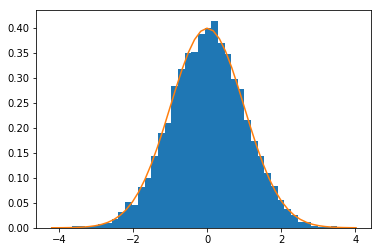

In [144]:
# somme de variables aléatoire
n_var = 10000
n_sum = 10000
est_m = []
for i in range(n_var):
    est_m = np.append(est_m,np.sum(np.random.randint(2,size=(n_sum))))

Z = np.sqrt(n_sum)*(est_m/n_sum - 0.5)/0.5;
pp.hist(Z,bins=40,normed=True)
pp.plot(xr,gauss(xr))